In [1]:
%pylab inline
import os
import DracoPy
import vtk
from vtk.util import numpy_support

import trako as TKO

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
DATADIR = '/home/d/DATA/Dropbox/ADHD_STFC_diff_for_Daniel/'

In [3]:
SUBJECTS = ['101','201']
GROUP = ['tracts_left_hemisphere']

In [4]:
files = os.listdir(os.path.join(DATADIR,SUBJECTS[0],GROUP[0]))
files[0]

'cluster_00616.vtp'

In [5]:
r = vtk.vtkXMLPolyDataReader()
r.SetFileName(os.path.join(DATADIR,SUBJECTS[0],GROUP[0],files[0]))
r.Update()
polydata = r.GetOutput()

In [6]:
points = numpy_support.vtk_to_numpy(polydata.GetPoints().GetData())
print('bytes', points.nbytes)
print('count', len(points.ravel()))

bytes 271020
count 67755


Position+Sequential
compressed bytes 70603
ratio 3.8386470829851422
restored count 67755
(0.0, 0.0019207000732421875, 0.0009555382405501677, 0.0005525281016645821)


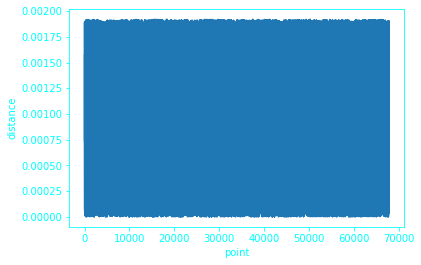

before
 [[-45.17117   17.051968  23.95285 ]
 [-44.73242   17.03107   24.136826]
 [-44.290363  17.010515  24.320517]
 [-43.845276  16.989777  24.504248]
 [-43.393936  16.973394  24.680552]
 [-42.93451   16.963942  24.84385 ]
 [-42.46606   16.963478  24.989338]
 [-41.986324  16.977627  25.103668]
 [-41.498077  17.0051    25.186945]
 [-41.004932  17.039797  25.25178 ]]
after
 [[-45.17190933  17.05336571  23.9532814 ]
 [-44.73095322  17.03035927  24.13733292]
 [-44.28999329  17.0111866   24.32138443]
 [-43.8452034   16.98818016  24.50543594]
 [-43.39274216  16.97284508  24.68181992]
 [-42.93261337  16.96517372  24.84286499]
 [-42.46481323  16.96517372  24.98857117]
 [-41.98551178  16.97667885  25.10360527]
 [-41.49854279  17.00351906  25.18796158]
 [-41.00390244  17.03802681  25.25314713]]


In [7]:
print('Position+Sequential')
compressed_points = DracoPy.encode_point_cloud_to_buffer(points.ravel(), position=True, sequential=True, quantization_bits=14, create_metadata=True)
print('compressed bytes', len(compressed_points))
print('ratio', points.nbytes / len(compressed_points))
restored_points = DracoPy.decode_point_cloud_buffer(compressed_points)
print('restored count', len(restored_points.points))
stats, distances = TKO.Util.error(points.ravel()[0:len(restored_points.points)], restored_points.points)
print(stats)
TKO.Util.plot(distances, 'point', 'distance')
print('before\n', points[0:10])
print('after\n', np.array(restored_points.points[0:30]).reshape(10,3))

Position+Unordered
compressed bytes 61648
ratio 4.396249675577472
restored count 58740
(7.82012939453125e-05, 57.338531494140625, 8.660356498982662, 7.621247065416906)


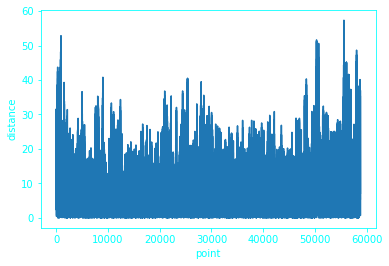

before
 [[-45.17117   17.051968  23.95285 ]
 [-44.73242   17.03107   24.136826]
 [-44.290363  17.010515  24.320517]
 [-43.845276  16.989777  24.504248]
 [-43.393936  16.973394  24.680552]
 [-42.93451   16.963942  24.84385 ]
 [-42.46606   16.963478  24.989338]
 [-41.986324  16.977627  25.103668]
 [-41.498077  17.0051    25.186945]
 [-41.004932  17.039797  25.25178 ]]
after
 [[-24.70381546   9.55325508  55.33411407]
 [-24.42390251   9.71046638  55.68688202]
 [-24.99522972   9.34619713  55.02735901]
 [-25.24830055   4.40363884  55.8019104 ]
 [-25.28664589   4.2234211   55.36095428]
 [-18.3386898    6.20581245  41.74495697]
 [-18.6109333    6.60075569  41.56473541]
 [-17.83254623   5.36990929  42.04787445]
 [-18.08178329   5.79169655  41.90216827]
 [-18.10478973   5.1973629   40.35689545]]


In [14]:
print('Position+Unordered')
compressed_points = DracoPy.encode_point_cloud_to_buffer(points.ravel(), position=True, sequential=False, quantization_bits=14)
print('compressed bytes', len(compressed_points))
print('ratio', points.nbytes / len(compressed_points))
restored_points = DracoPy.decode_point_cloud_buffer(compressed_points)
print('restored count', len(restored_points.points))
stats, distances = TKO.Util.error(points.ravel()[0:len(restored_points.points)], restored_points.points)
print(stats)
TKO.Util.plot(distances, 'point', 'distance')
print('before\n', points[0:10])
print('after\n', np.array(restored_points.points[0:30]).reshape(10,3))

Generic+Sequential
compressed bytes 100014
ratio 2.709820625112484
restored count 67755
(0.0, 0.013645172119140625, 0.006837380018128746, 0.003940605528455457)


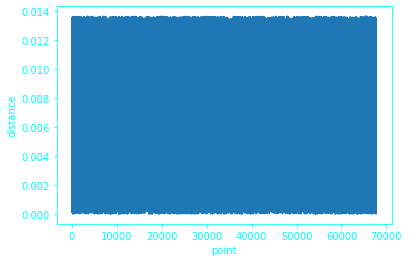

before
 [[-45.17117   17.051968  23.95285 ]
 [-44.73242   17.03107   24.136826]
 [-44.290363  17.010515  24.320517]
 [-43.845276  16.989777  24.504248]
 [-43.393936  16.973394  24.680552]
 [-42.93451   16.963942  24.84385 ]
 [-42.46606   16.963478  24.989338]
 [-41.986324  16.977627  25.103668]
 [-41.498077  17.0051    25.186945]
 [-41.004932  17.039797  25.25178 ]]
after
 [[-45.15776443  17.03917694  23.96509552]
 [-44.72148514  17.03917694  24.12870026]
 [-44.28520584  17.01190948  24.31957245]
 [-43.84892654  16.98464203  24.51044464]
 [-43.38538361  16.98464203  24.67404938]
 [-42.92183685  16.95737457  24.83765411]
 [-42.4582901   16.95737457  25.00125885]
 [-41.99474335  16.98464203  25.11032867]
 [-41.50393295  17.01190948  25.19213104]
 [-41.01311874  17.03917694  25.24666595]]


In [16]:
print('Generic+Sequential')
compressed_points = DracoPy.encode_point_cloud_to_buffer(points.ravel(), position=False, sequential=True, quantization_bits=12, compression_level=10)
print('compressed bytes', len(compressed_points))
print('ratio', points.nbytes / len(compressed_points))
restored_points = DracoPy.decode_point_cloud_buffer(compressed_points)
print('restored count', len(restored_points.points))
stats, distances = TKO.Util.error(points.ravel()[0:len(restored_points.points)], restored_points.points)
print(stats)
TKO.Util.plot(distances, 'point', 'distance')
print('before\n', points[0:10])
print('after\n', np.array(restored_points.points[0:30]).reshape(10,3))

Generic+Unordered
compressed bytes 7920
ratio 34.21969696969697
restored count 67755
(0.000408172607421875, 106.6016731262207, 31.765246907431838, 23.27403770335186)


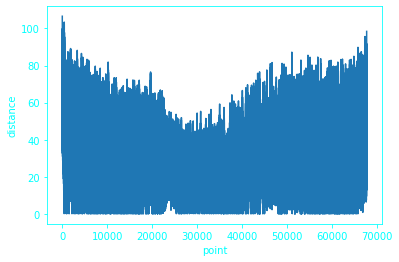

before
 [[-45.17117   17.051968  23.95285 ]
 [-44.73242   17.03107   24.136826]
 [-44.290363  17.010515  24.320517]
 [-43.845276  16.989777  24.504248]
 [-43.393936  16.973394  24.680552]
 [-42.93451   16.963942  24.84385 ]
 [-42.46606   16.963478  24.989338]
 [-41.986324  16.977627  25.103668]
 [-41.498077  17.0051    25.186945]
 [-41.004932  17.039797  25.25178 ]]
after
 [[61.43050385 61.05564117 61.01474762]
 [60.87844086 60.98748779 60.71486664]
 [60.69441986 60.63989258 60.5853653 ]
 [60.48994446 60.37408447 60.25821686]
 [60.27866364 60.1696167  60.03330231]
 [60.00604248 59.89017487 59.76068115]
 [59.71296692 59.69252014 59.51531982]
 [59.39945221 59.35174561 59.35174561]
 [59.12683105 59.07230377 59.00415039]
 [58.93598938 58.84057617 58.84057617]]


In [10]:
print('Generic+Unordered')
compressed_points = DracoPy.encode_point_cloud_to_buffer(points.ravel(), position=False, sequential=False, quantization_bits=14)
print('compressed bytes', len(compressed_points))
print('ratio', points.nbytes / len(compressed_points))
restored_points = DracoPy.decode_point_cloud_buffer(compressed_points)
print('restored count', len(restored_points.points))
stats, distances = TKO.Util.error(points.ravel()[0:len(restored_points.points)], restored_points.points)
print(stats)
TKO.Util.plot(distances, 'point', 'distance')
print('before\n', points[0:10])
print('after\n', np.array(restored_points.points[0:30]).reshape(10,3))

In [11]:
with open('/tmp/a.drc', 'wb') as f:
    f.write(compressed_points)

restored count 67755
(0.000408172607421875, 106.6016731262207, 31.765246907431838, 23.27403770335186)


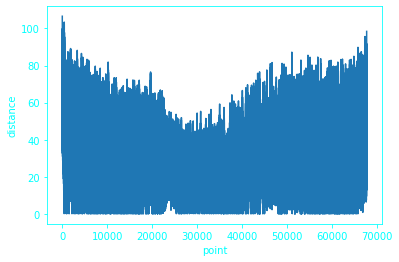

before
 [[-45.17117   17.051968  23.95285 ]
 [-44.73242   17.03107   24.136826]
 [-44.290363  17.010515  24.320517]
 [-43.845276  16.989777  24.504248]
 [-43.393936  16.973394  24.680552]
 [-42.93451   16.963942  24.84385 ]
 [-42.46606   16.963478  24.989338]
 [-41.986324  16.977627  25.103668]
 [-41.498077  17.0051    25.186945]
 [-41.004932  17.039797  25.25178 ]]
after
 [[61.43050385 61.05564117 61.01474762]
 [60.87844086 60.98748779 60.71486664]
 [60.69441986 60.63989258 60.5853653 ]
 [60.48994446 60.37408447 60.25821686]
 [60.27866364 60.1696167  60.03330231]
 [60.00604248 59.89017487 59.76068115]
 [59.71296692 59.69252014 59.51531982]
 [59.39945221 59.35174561 59.35174561]
 [59.12683105 59.07230377 59.00415039]
 [58.93598938 58.84057617 58.84057617]]


In [12]:
with open('/tmp/a.drc', 'rb') as f:
    compressed_points = f.read()
restored_points = DracoPy.decode_point_cloud_buffer(compressed_points)
print('restored count', len(restored_points.points))
stats, distances = TKO.Util.error(points.ravel()[0:len(restored_points.points)], restored_points.points)
print(stats)
TKO.Util.plot(distances, 'point', 'distance')
print('before\n', points[0:10])
print('after\n', np.array(restored_points.points[0:30]).reshape(10,3))

In [13]:
np.where(np.array(distances) > 1)

(array([    0,     1,     2, ..., 67752, 67753, 67754]),)